This notebooks is written to clean our raw dataset and for solving unwanted issues so that we can use the data well structred dataset. 

# Importing Necessary Modules

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_f = pd.read_csv('/content/drive/MyDrive/PCOS/PCOS_data_without_infertility.csv')
df_f.head(12).T

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    object 
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

# Explore Dataset

# Check For Null Values

In [ ]:
df_f.isnull()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
537,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
538,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_f.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
# Drop the column containg almost all null and uninterpretable values
df_f = df_f.drop(columns='Unnamed: 44')
# Drop unnecessary colunms
df_f = df_f.drop(columns=['Sl. No','Patient File No.'])

In [ ]:
df_f.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
PCOS (Y/N),0,0,1,0,0,0,0,0,0,0,0,0
Age (yrs),28,36,33,37,25,36,34,33,32,36,20,26
Weight (Kg),44.6,65,68.8,65,52,74.1,64,58.5,40,52,71,49
Height(Cm),152,161.5,165,148,161,165,156,159,158,150,163,160
BMI,19.3,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
Blood Group,15,15,11,13,11,15,11,13,11,15,15,13
Pulse rate(bpm),78,74,72,72,72,78,72,72,72,80,80,72
RR (breaths/min),22,20,18,20,18,28,18,20,18,20,20,20
Hb(g/dl),10.48,11.7,11.8,12,10,11.2,10.9,11,11.8,10,10,9.5
Cycle(R/I),2,2,2,2,2,2,2,2,2,4,2,2


# Handling Missing Values

# Drop Rows with null values

In [ ]:
df_f.dropna(axis=0, inplace=True)

In [ ]:
df_f.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    object 
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

# Solve corrupted values

In [ ]:
df_f

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,#NAME?,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,#NAME?,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,#NAME?,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,#NAME?,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,5.56,28,26,0.93,1.11,1.7,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,1.79,34,32,0.94,2.05,5.6,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,4.30,30,28,0.93,2.87,3.7,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,2,2.0,0,0,292.92,1.99,4.40,4.33,1.02,28,26,0.93,2.50,5.2,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
#calculating BMI
df_f['BMI'] = (df_f['Weight (Kg)']/(df_f['Height(Cm) '])**2)*10000
df_f

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.304017,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.456637,17,72,16,11.00,2,5,8.0,0,1,1.99,1.99,10.06,1.81,5.56,28,26,0.93,1.11,1.7,5.30,36.6,0.25,92.0,0,0,0,0,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.316456,15,72,18,10.80,2,5,4.0,1,1,80.13,1.99,5.07,2.84,1.79,34,32,0.94,2.05,5.6,21.09,23.0,0.25,108.0,1,0,0,0,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.372576,13,74,20,10.80,2,6,8.0,0,0,1.99,1.99,11.96,2.78,4.30,30,28,0.93,2.87,3.7,96.41,22.5,0.25,92.0,0,0,0,0,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.222222,15,74,20,12.00,4,2,2.0,0,0,292.92,1.99,4.40,4.33,1.02,28,26,0.93,2.50,5.2,38.89,22.4,0.25,115.0,0,0,0,0,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
df_f.loc[:,"FSH/LH"] = df_f.loc[:,"FSH(mIU/mL)"] / df_f.loc[:,"LH(mIU/mL)"];
df_f.loc[:,"FSH/LH"] = df_f.loc[:,"FSH/LH"].round(2);

In [ ]:
df_f.loc[:,"Waist:Hip Ratio"] = df_f.loc[:,"Waist(inch)"] / df_f.loc[:,"Hip(inch)"]
df_f.loc[:,"Waist:Hip Ratio"] = df_f.loc[:,"Waist:Hip Ratio"].round(2)

In [ ]:
df_f.head(12)

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.304017,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.10,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.30,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.70,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.40,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.80,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0
5,0,36,74.1,165.0,27.217631,15,78,28,11.20,2,5,8.0,1,0,237.97,1.99,3.24,1.07,3.03,44,38,0.86,1.60,6.74,16.18,52.40,0.30,76.0,1,0,0,1,0,0.0,0,110,70,9,6,16.0,20.0,8.0
6,0,34,64.0,156.0,26.298488,11,72,18,10.90,2,5,2.0,0,0,1.99,1.99,2.85,0.31,9.19,39,33,0.85,1.51,3.05,26.41,42.70,0.46,93.0,0,0,0,0,0,0.0,0,120,80,6,6,15.0,16.0,6.8
7,0,33,58.5,159.0,23.139907,13,72,20,11.00,2,5,13.0,1,2,100.51,100.51,4.86,3.07,1.58,44,38,0.86,12.18,1.54,3.97,38.00,0.26,91.0,1,0,0,0,0,0.0,0,120,80,7,6,15.0,18.0,7.1
8,0,32,40.0,158.0,16.023073,11,72,18,11.80,2,5,8.0,0,1,1.99,1.99,3.76,3.02,1.25,39,35,0.90,1.51,1,19.00,21.80,0.30,116.0,0,0,0,0,0,0.0,0,120,80,5,7,17.0,17.0,4.2
9,0,36,52.0,150.0,23.111111,15,80,20,10.00,4,2,4.0,0,0,1.99,1.99,2.80,1.51,1.85,40,38,0.95,6.65,1.61,11.74,27.70,0.25,125.0,0,0,0,0,0,0.0,0,110,80,1,1,14.0,17.0,2.5


In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    fl

# Replace Irrelevant Values

In [ ]:
# df[df["Cycle(R/I)"] == 5] 
df_f["Cycle(R/I)"].replace({5: 4}, inplace=True)
df_f["Cycle(R/I)"].replace({2: 0, 4: 1}, inplace=True)

In [ ]:
df_f["II    beta-HCG(mIU/mL)"].replace({"1.99.": 1.99}, inplace=True)

In [ ]:
df_f["II    beta-HCG(mIU/mL)"] = df_f["II    beta-HCG(mIU/mL)"].astype(float)

In [ ]:
df_f[df_f["AMH(ng/mL)"]== "a"].T

,305
PCOS (Y/N),0
Age (yrs),37
Weight (Kg),56
Height(Cm),152
BMI,24.2382
Blood Group,13
Pulse rate(bpm),74
RR (breaths/min),20
Hb(g/dl),11.7
Cycle(R/I),0


In [ ]:
# df_f.drop(df_f["AMH(ng/mL)"]== "a", inplace=True)
df_f.drop(df_f.loc[df_f["AMH(ng/mL)"]== "a"].index, inplace=True);

In [ ]:
df_f[df_f["AMH(ng/mL)"]== "a"]

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)


In [ ]:
df_f["AMH(ng/mL)"] = df_f["AMH(ng/mL)"].astype(float)

In [ ]:
df_f.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              538 non-null    int64  
 1    Age (yrs)              538 non-null    int64  
 2   Weight (Kg)             538 non-null    float64
 3   Height(Cm)              538 non-null    float64
 4   BMI                     538 non-null    float64
 5   Blood Group             538 non-null    int64  
 6   Pulse rate(bpm)         538 non-null    int64  
 7   RR (breaths/min)        538 non-null    int64  
 8   Hb(g/dl)                538 non-null    float64
 9   Cycle(R/I)              538 non-null    int64  
 10  Cycle length(days)      538 non-null    int64  
 11  Marraige Status (Yrs)   538 non-null    float64
 12  Pregnant(Y/N)           538 non-null    int64  
 13  No. of aborptions       538 non-null    int64  
 14    I   beta-HCG(mIU/mL)  538 non-null    fl

## Count

0    362
1    176
Name: PCOS (Y/N), dtype: int64


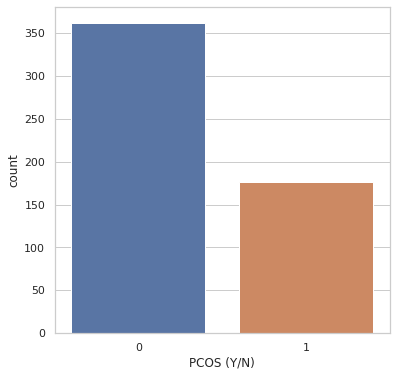

In [ ]:
print(df_f['PCOS (Y/N)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='PCOS (Y/N)',
    data=df_f
);

5     275
6      91
4      60
2      38
3      36
7      18
9       9
11      5
12      2
8       2
10      1
0       1
Name: Cycle length(days), dtype: int64


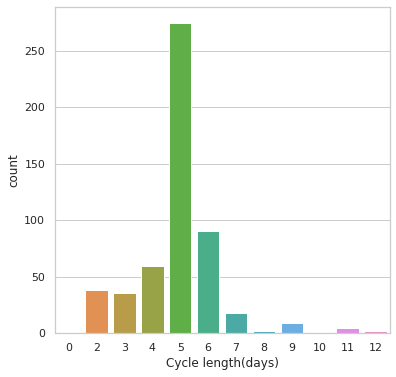

In [ ]:
print(df_f['Cycle length(days)'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='Cycle length(days)',
    data=df_f
);

110    264
120    250
100     13
130      8
140      2
12       1
Name: BP _Systolic (mmHg), dtype: int64


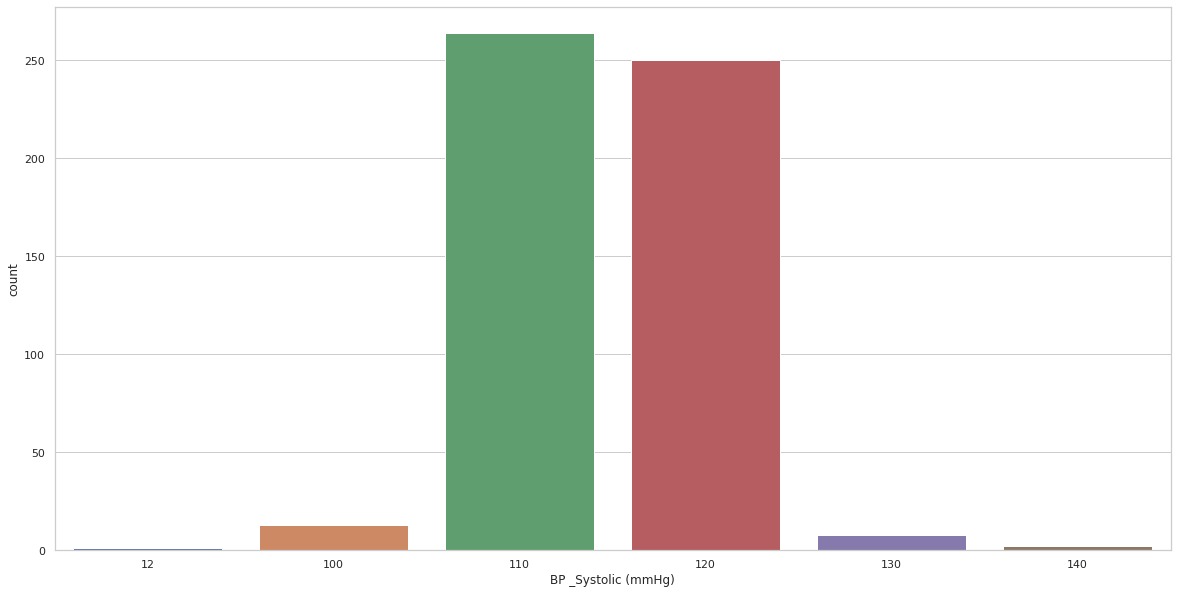

In [ ]:
print(df_f['BP _Systolic (mmHg)'].value_counts())
plt.figure(figsize=(20, 10))
sns.countplot(
    x='BP _Systolic (mmHg)',
    data=df_f
);

In [ ]:
df_f["BP _Systolic (mmHg)"].replace({12: 120}, inplace=True)
df_f["BP _Diastolic (mmHg)"].replace({8: 80}, inplace=True)

# Save Cleaned Dataset

In [ ]:
#df_f.to_csv('../../datasets/PCOS_clean_data_without_infertility.csv', index=False)